In [2]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

### read all datasets

In [3]:
internetPjl = pd.read_csv('../data/2015-2018年各省互联网普及率.csv',encoding='GBK')
GDP = pd.read_csv('../data/2019年前三季度各省市GDP.csv',encoding='GBK')
company = pd.read_csv('../data/cleaned_compc.csv',encoding='GBK')
schoolpop = pd.read_csv('../data/schoolpop.csv',encoding='GBK')
dzdp = pd.read_csv('../data/大众点评.csv',encoding='utf-8')
baiduss = pd.read_csv('../data/关注度.csv',encoding='utf-8')

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
company['省份赋值'] = 1  #方便计算公司数量
summarized_company = company.groupby(by = '所属省份')['省份赋值'].sum()
summarized_company = pd.DataFrame(summarized_company)
company_account = summarized_company.reset_index()
company_account = company_account.rename(columns = {'所属省份':'省份/直辖市','省份赋值':'少儿编程公司数量'})
print(company_account['少儿编程公司数量'].sum())
#company_account

392


In [5]:
baiduss = baiduss.rename(columns = {'省份':'省份/直辖市','搜索指数日均值':'百度搜索指数'})
baiduss = baiduss.sort_values(by = '百度搜索指数',axis = 0,ascending = True)
#baiduss

In [6]:
internetPjl2018 = internetPjl[['省市','2018年互联网普及率%']]
internetPjl2018 = internetPjl2018.rename(columns = {'省市':'省份/直辖市'})
#internetPjl2018

In [7]:
provGDP = GDP[['省份/直辖市','省份/直辖市GDP总量（2019年前三季度）亿元']]
provGDP = provGDP.drop_duplicates()
provGDP = provGDP.rename(columns = {'省份/直辖市GDP总量（2019年前三季度）亿元':'GDP总量（2019年前三季度）亿元'})
#provGDP

In [8]:
zxrk = schoolpop[['省份','小初高人口合计（万人）']]
zxrk = zxrk.rename(columns = {'省份':'省份/直辖市','小初高人口合计（万人）':'小初高在校人口数（万人）'})
zxrk = zxrk.dropna()
#zxrk

In [9]:
provdzdp = dzdp.groupby(by = '省市')['搜索“少儿编程”结果数量'].sum()
provdzdp = pd.DataFrame(provdzdp)
provdzdp
provdzdp_search = provdzdp.reset_index()
provdzdp_search = provdzdp_search.rename(columns = {'省市':'省份/直辖市','搜索“少儿编程”结果数量':'大众点评搜索数量'})
#provdzdp_search

### merge all data into one dataframe 

In [10]:
alldata = [provGDP,internetPjl2018,baiduss,company_account,zxrk,provdzdp_search]
finaldf = pd.DataFrame({'省份/直辖市':baiduss['省份/直辖市']})
for table in alldata:
    finaldf = pd.merge(finaldf,table,how='outer')
finaldf = finaldf.fillna(0)
finaldf = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = True)
finaldf.set_index(["省份/直辖市"], inplace=True)
#finaldf

In [11]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 西藏 to 广东
Data columns (total 6 columns):
GDP总量（2019年前三季度）亿元    31 non-null int64
2018年互联网普及率%          31 non-null int64
百度搜索指数                31 non-null int64
少儿编程公司数量              31 non-null float64
小初高在校人口数（万人）          31 non-null float64
大众点评搜索数量              31 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.7+ KB


### visualize data

- **Location of youth programing education enterprise & The number of offline Youth programing training institutions on dianping**

    - Bar chart

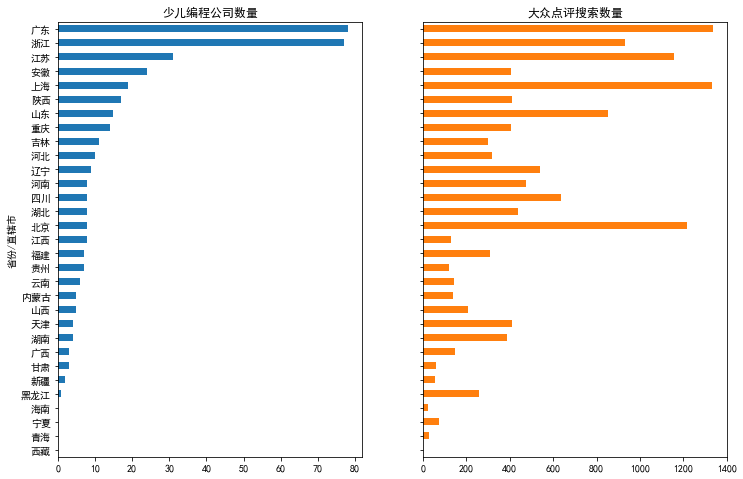

In [12]:
dzdp_comp= finaldf[['少儿编程公司数量','大众点评搜索数量']]

# 正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

dzdp_comp.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False,
               figsize=(12, 8))
plt.savefig('./comp_dzdp.jpg')
plt.show()

    - Bubble chart

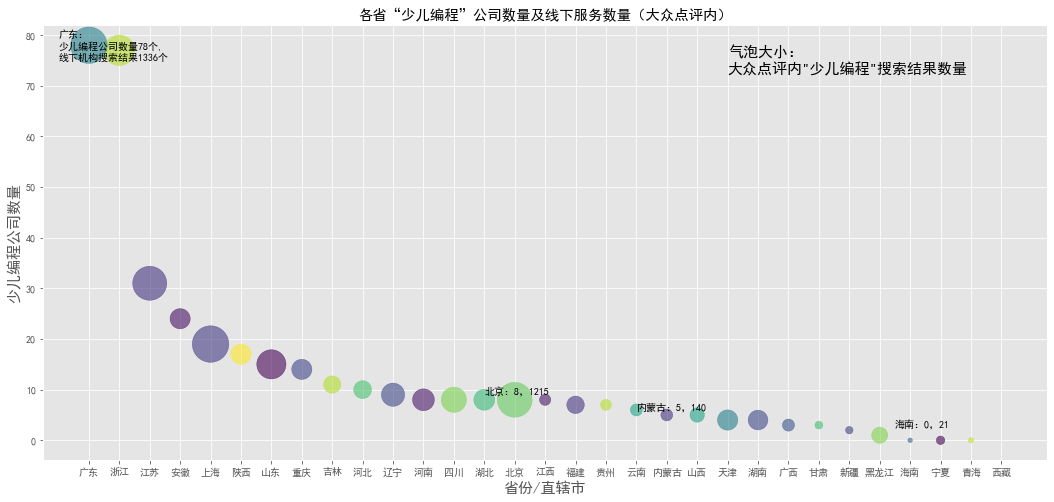

In [13]:
colors = np.random.rand(len(dzdp_comp.index))  # 颜色数组
size = dzdp_comp['大众点评搜索数量']
plt.figure(figsize=(18, 8))
plt.style.use('ggplot')
plt.scatter(dzdp_comp.index,dzdp_comp['少儿编程公司数量'],  s=size,c = colors, alpha=0.6)
plt.xlabel('省份/直辖市',fontsize=15)
plt.ylabel('少儿编程公司数量',fontsize=15)
plt.gca().invert_xaxis()
plt.text(x=9,y=72,s = '气泡大小：\n大众点评内"少儿编程"搜索结果数量',fontsize=15,verticalalignment="bottom",horizontalalignment="left")
plt.title('各省“少儿编程”公司数量及线下服务数量（大众点评内）')
plt.annotate("广东：\n少儿编程公司数量78个,\n线下机构搜索结果1336个",(31,75), xycoords='data')
         #xytext=(28, 79),
         #arrowprops=dict(arrowstyle='->'))
plt.annotate("北京：8，1215",(17,9))
plt.annotate("内蒙古：5，140",(12,6))
plt.annotate("海南：0，21",(3.5,2.5))
plt.savefig('./comp_dzdp_bubble.jpg')
plt.show()
#reference：https://blog.csdn.net/robert_chen1988/article/details/100027423

- **Baidu search index of *Youth programing***

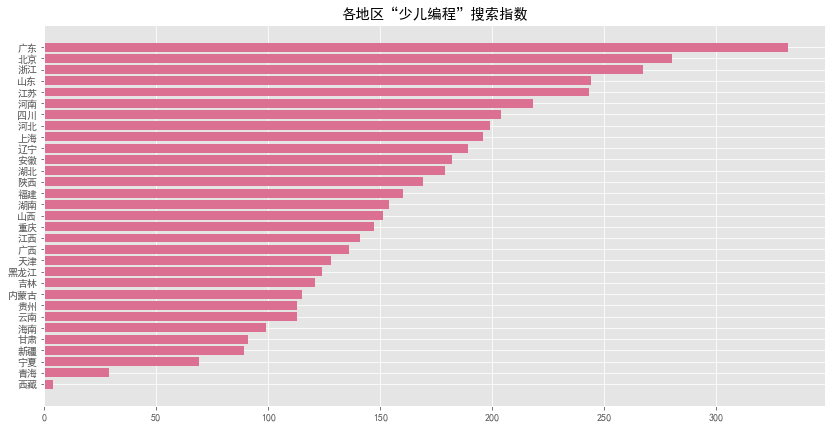

In [14]:
plt.figure(figsize=(14, 7))
plt.barh(baiduss['省份/直辖市'], baiduss['百度搜索指数'],color = 'palevioletred')
plt.title('各地区“少儿编程”搜索指数')
#plt.savefig('./mediacon.jpg')
plt.show()

- **Location of youth programing education enterprise & GDP**

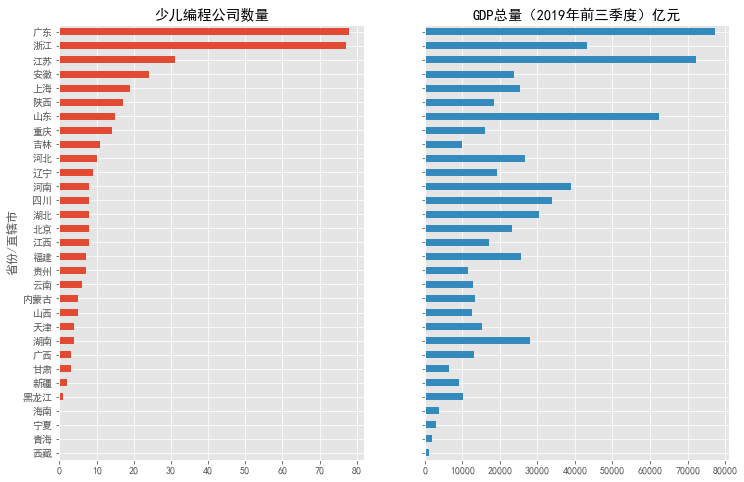

In [15]:
gdp_comp = finaldf.loc[:,['少儿编程公司数量','GDP总量（2019年前三季度）亿元']]
#sns.set_style("white")
gdp_comp.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False,figsize=(12, 8))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#plt.savefig('./comp_.jpg')
plt.show()

- **Location of youth programing education enterprise & Primary, secondary and high school population**

In [16]:
#zxrk_comp= finaldf[['少儿编程公司数量','小初高在校人口数（万人）']]
#zxrk_comp.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False,
               #figsize=(12, 8),color=['skyblue','coral'])
#plt.savefig('./comp_zxrk.jpg')
#plt.show()

In [17]:
schoolpop = schoolpop.dropna()
schoolpop = schoolpop.rename(columns = {'省份':'省份/直辖市'})
zxrkdetail_comp = pd.merge(company_account,schoolpop,how='outer')
zxrkdetail_comp = zxrkdetail_comp.fillna(0)
zxrkdetail_comp = zxrkdetail_comp.sort_values(by = '少儿编程公司数量',axis = 0,ascending = True)
zxrkdetail_comp.set_index(["省份/直辖市"], inplace=True)
#zxrkdetail_comp

In [18]:
zxrkdetail = zxrkdetail_comp[['小学（万人）','初中（万人）','高中（万人）','中等职业教育学校（万人）']]
zxrkdetail

,小学（万人）,初中（万人）,高中（万人）,中等职业教育学校（万人）
省份/直辖市,,,,
西藏,32.63,12.94,6.17,2.28
青海,48.60,22.28,12.67,7.70
宁夏,58.14,29.04,14.76,7.28
海南,83.19,35.28,17.01,13.46
黑龙江,131.90,93.30,54.80,18.00
新疆,242.68,92.45,54.97,25.37
广西,476.78,212.64,103.58,67.76
甘肃,189.65,87.00,54.93,18.90
湖南,522.00,240.50,117.50,65.80


In [19]:
dzdp_comp2 = dzdp_comp.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
#dzdp_comp2

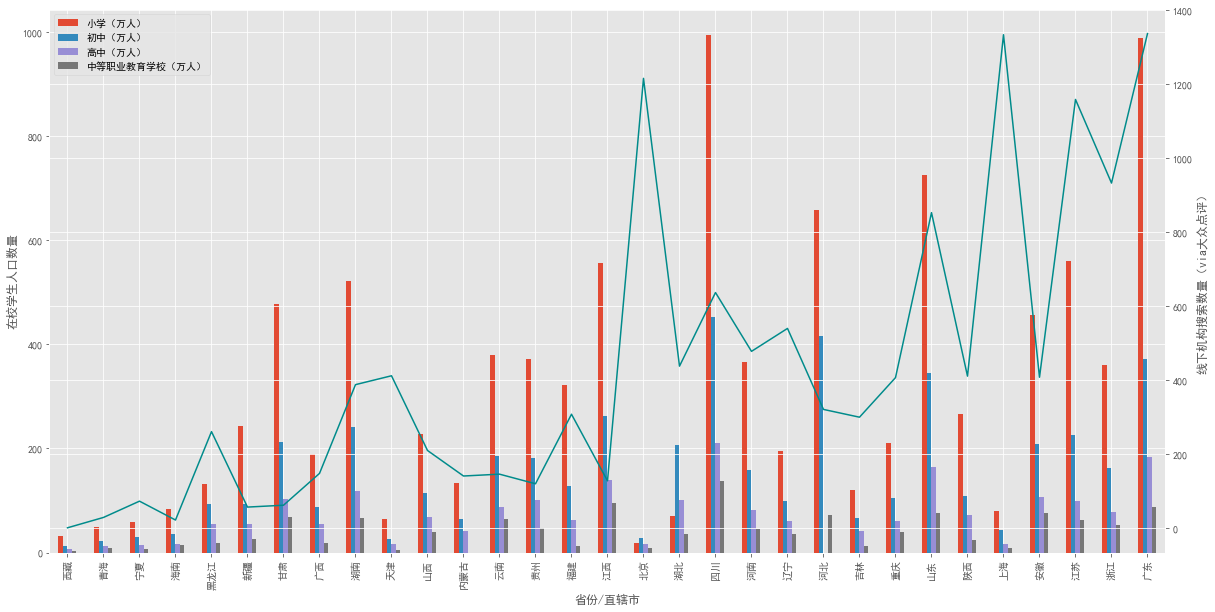

In [20]:
ax = zxrkdetail.plot(kind = 'bar', subplots = False,sharex = True,legend = False,
               figsize=(20,10))
plt.legend()
ax.set_ylabel('在校学生人口数量')
ax2 = ax.twinx()
ax2.yaxis.set_ticks_position('right') 
ax2.set_ylabel('线下机构搜索数量（via大众点评）')
ax2.plot(dzdp_comp.index,'大众点评搜索数量',data = dzdp_comp,label='大众点评搜索数量',color = 'darkcyan')

- **Location of youth programing education enterprise & Internet penetration**

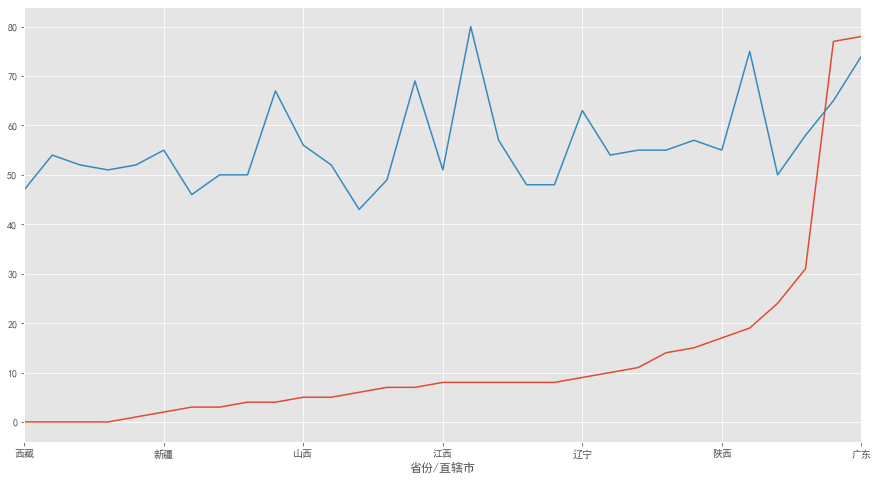

In [21]:
pjl_comp= finaldf.loc[:, ['少儿编程公司数量','2018年互联网普及率%']]
ax = pjl_comp.plot(kind = 'line', subplots = False, layout = (1, 2), sharex = False, sharey = True, legend = False,
               figsize=(15, 8))
#plt.savefig('./comp_pjl.jpg')
plt.show()

- **Location of youth programing education enterprise & Baidu search index of *Youth programing***

In [ ]:
pjl_comp= finaldf[['少儿编程公司数量','百度搜索指数']]
pjl_comp.plot(kind = 'bar', subplots = False, layout = (1, 2), sharex = False, sharey = True, legend = False,
               figsize=(12, 8),color=['skyblue','palevioletred'])
#plt.savefig('./comp_media.jpg')
plt.legend()
plt.show()

- **The correlation matrix between each variable**

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(finaldf.corr(), annot=True, linewidths=.2, cmap= 'RdBu_r')
plt.savefig('./final.jpg')
plt.show()

In [ ]:
finaldf2 = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
finaldf2_15 = finaldf2.iloc[:15]

In [ ]:
groupbar15_ = finaldf2_15.loc[:, ['GDP总量（2019年前三季度）亿元','百度搜索指数','大众点评搜索数量']]
groupbar15 = finaldf2_15.loc[:, ['少儿编程公司数量','百度搜索指数','大众点评搜索数量']]

In [ ]:
groupbar15_.plot.bar(rot=0,figsize = (15,8))

In [ ]:
#plt.figure(figsize = (20,30))
groupbar15.plot.bar(rot=0,figsize = (15,8))

In [ ]:
finaldf2_15

In [ ]:
finaldf2_15.index

In [ ]:
# multiple line plot
######plt.figure(figsize = (15,8))
plt.style.use('ggplot')
fig,ax1 = plt.subplots(figsize = (15,8))
ax2 = ax1.twinx()
#ax1.plot(finaldf2_15.index, '百度搜索指数', data=finaldf2_15, marker='', color='olive', linewidth=2)
ax1.bar(finaldf2_15.index, '百度搜索指数', data=finaldf2_15)
#ax1.plot(finaldf2_15.index, '大众点评搜索数量', data=finaldf2_15, marker='', color='olive', linewidth=2, linestyle='dashed',label="toto")
ax1.bar(finaldf2_15.index, '大众点评搜索数量', data=finaldf2_15,label="toto",width = 0.1)
#plt.legend()
ax2.plot(finaldf2_15.index, 'GDP总量（2019年前三季度）亿元', data=finaldf2_15, marker='', markersize=8, linewidth=3)
plt.legend()


In [ ]:

plt.plot(finaldf2_15.index, '少儿编程公司数量', data=finaldf2_15, marker='o', markerfacecolor='darkcyan', markersize=8, color='skyblue', linewidth=3)
plt.plot(finaldf2_15.index, '百度搜索指数', data=finaldf2_15, marker='', color='olive', linewidth=2)
plt.plot(finaldf2_15.index, '大众点评搜索数量', data=finaldf2_15, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()